# Analysis and Visualisation of Tour de France winner data

In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)

In [4]:
stages = pd.read_csv('tdf_stages.csv')
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [5]:
winners = pd.read_csv('tdf_winners.csv')
winners.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


## Data cleaning

In [6]:
stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage           2236 non-null   object 
 1   Date            2236 non-null   object 
 2   Distance        2236 non-null   float64
 3   Origin          2236 non-null   object 
 4   Destination     2236 non-null   object 
 5   Type            2236 non-null   object 
 6   Winner          2236 non-null   object 
 7   Winner_Country  2184 non-null   object 
dtypes: float64(1), object(7)
memory usage: 139.9+ KB


#### Stage is object type:

There is a stage called prologue (P), this is raced before stage 1, it is usually less than 8km and the winner wears the leaders yellow jersey for stage 1.
* Prologues aren’t held every year, but when contested, the short distance gives fans immediate knowledge of just how fast cyclists can pedal. Prologues also provide the first look at the condition or lack of condition of overall title favorites, and showcase the most technological advances in bikes, wheels, helmets, clothing, and so on.
Some of the stage are also split into substages i.e 8a, 8b, 8c.

#### Date is object type:

We want to amend date so it shows just the year and is an integer.

In [7]:
# For dates we only want the year
stages['Date'] = stages['Date'].str[0:4].astype(int)
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [48]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    int64  
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

Same issue with the date here.

In [9]:
winners['start_date'] = winners['start_date'].str[0:4].astype(int)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
5,6,1908,Lucien Petit-Breton,Peugeot–Wolber,4497.0,NaN,NaN,5,13,NaN,NaN,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
6,7,1909,François Faber,Alcyon–Dunlop,4498.0,NaN,NaN,6,13,1.78,88.0,22,1887-01-26,1915-05-09,NaN,The giant of colombes,Aulnay-sur-Iton,France,Luxembourg
7,8,1910,Octave Lapize,Alcyon–Dunlop,4734.0,NaN,NaN,4,3,NaN,NaN,22,1887-10-24,1917-07-14,NaN,NaN,Paris,France,France
8,9,1911,Gustave Garrigou,Alcyon–Dunlop,5343.0,NaN,NaN,2,13,NaN,NaN,26,1884-09-24,1963-01-28,Cyprien Gustave Garrigou,NaN,Vabres,France,France
9,10,1912,Odile Defraye,Alcyon–Dunlop,5289.0,NaN,NaN,3,13,NaN,NaN,23,1888-07-14,1965-08-21,NaN,NaN,Rumbeke,Belgium,Belgium


We can also perform some feature engineering to get the average speed of the winning riders.

In [ ]:
winners['average_speed'] = winners['distance'] / winners['time_overall']
winners.head(10)

## Visualising some of the data about the winners of the tdf

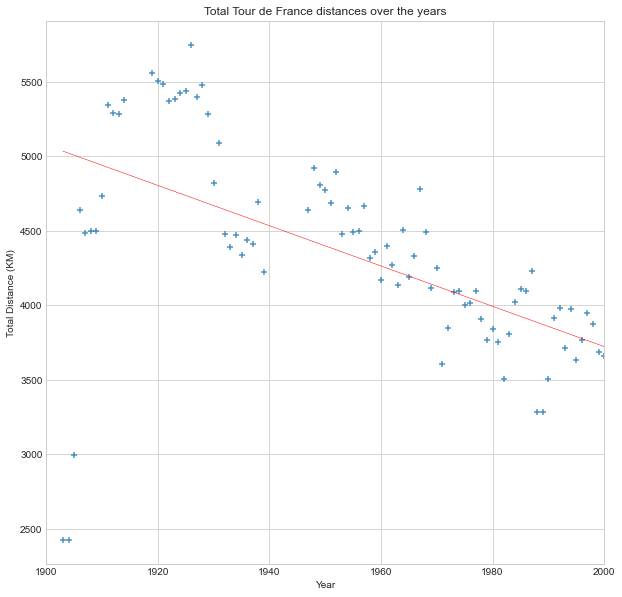

In [59]:
# Year vs distance
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=winners['start_date'],y=winners['distance'], marker='+', ci=None, line_kws = {'color': 'red', 'lw':0.5})
ax.set_xlim([1900, 2000]);
ax.set(title='Total Tour de France distances over the years',
       xlabel='Year',
       ylabel='Total Distance (KM)');

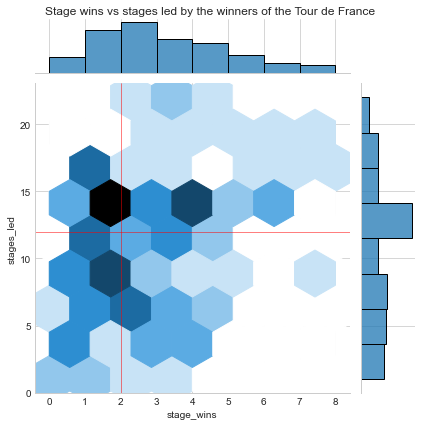

In [79]:
# Now lets look at number of stage wins & stages led, remember a rider can win GC without winning a stage.
ax = sns.jointplot(x=winners['stage_wins'],
                   y=winners['stages_led'],
                   kind='hex');
ax.fig.suptitle('Stage wins vs stages led by the winners of the Tour de France');
ax.fig.subplots_adjust(top=0.95) # Reduce plot to make room
ax.ax_joint.axhline(winners['stages_led'].median(), c='red', lw=0.5);
ax.ax_joint.axvline(winners['stage_wins'].median(), c='red', lw=0.5);

In [80]:
winners['stage_wins'].median(), winners['stages_led'].median()

(2.0, 12.0)

As the data isn't normally distributed it is better to use the median as our average, we can see that the average stages won by a tdf winner is 2 and the average stages led by a tdf winner is 12.

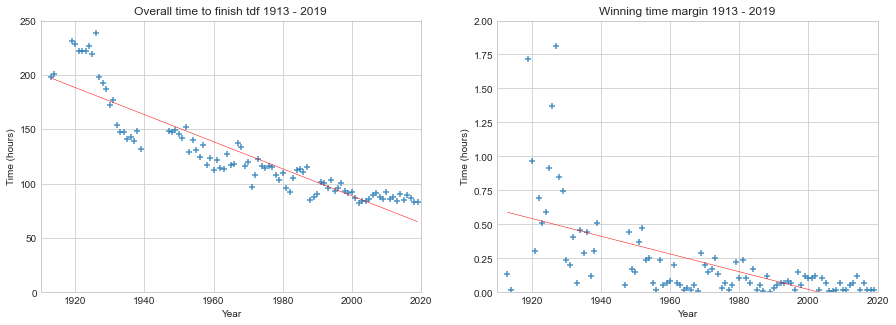

In [86]:
# Now we can look at the times taken to complete the tdf, times are recorded in hours and distance in KM.
# There are 8 missing values from 1905 - 1912 so we will start from 1913.
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.regplot(x=winners['start_date'][10:], y=winners['time_overall'][10:], marker='+', ci=None, ax=ax0,
            line_kws = {'color': 'red', 'lw':0.5});
ax0.set(title='Overall time to finish tdf 1913 - 2019',
       xlabel='Year',
       ylabel='Time (hours)');
ax0.set_xlim([1910,2020]);
ax0.set_ylim([0,250]);

sns.regplot(x=winners['start_date'][10:], y=winners['time_margin'][10:], marker='+', ci=None, ax=ax1,
            line_kws = {'color': 'red', 'lw':0.5});
ax1.set(title='Winning time margin 1913 - 2019',
        xlabel='Year',
        ylabel='Time (hours)');
ax1.set_ylim([0,2]);
ax1.set_xlim([1910,2020]);

Can see that the winning time margin would fit an exponential curve better so going to fit using scipy.optimize package

In [15]:
from scipy.optimize import curve_fit

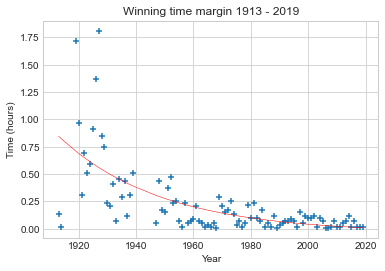

In [72]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = winners['start_date'][10:]
ydata = winners['time_margin'][10:]

plt.scatter(xdata, ydata, marker='+')
popt, pcov = curve_fit(func, xdata, ydata, p0=[0.5, 1e-6, 0.5], maxfev=5000);

plt.plot(xdata, func(xdata, *popt), 'r-', linewidth=0.5);
plt.title('Winning time margin 1913 - 2019');
plt.xlabel('Year');
plt.ylabel('Time (hours)');

This is interesting, we can see that the winning time margin has been decreasing over the years hence implying it is becoming a closer competition. The margin for error has been getting smaller since the race began.

Next I want to look at the average speed of the riders, we can do this by performing some feature engineering to produce an averages km/h column in the dataframe. As we only have times for riders from 1913 to 2019 we will have to remove the riders from 1905 - 1912.

In [45]:
winners['average_speed'] = winners['distance'] / winners['time_overall']
winners.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
0,1,1903,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,25.678478
1,2,1904,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,25.265714
2,3,1905,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,NaN
3,4,1906,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France,NaN
4,5,1907,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,NaN


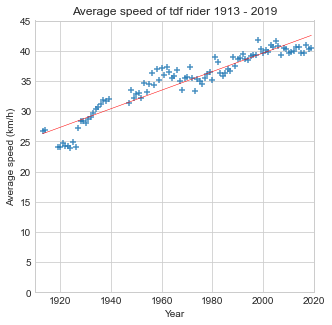

In [84]:
fig, ax = plt.subplots(figsize=(5,5))

sns.regplot(x=winners['start_date'][10:], y=winners['average_speed'][10:], marker='+', ci=None, 
            line_kws = {'color': 'red', 'lw':0.5});
ax.set(title='Average speed of tdf rider 1913 - 2019',
       xlabel='Year',
       ylabel='Average speed (km/h)');
ax.set_xlim([1910,2020]);
ax.set_ylim([0,45]);

So, we can see that as the race has been getting gradually shorter the riders have been getting much faster. This is likely due to a variety of reasons such as training methods and nutrition as well as advancements in cycling technology.

In [91]:
winners.groupby(['winner_name', 'nationality']).size().sort_values(ascending=False).head(10)

winner_name          nationality   
Lance Armstrong       United States    7
Bernard Hinault       France           5
Jacques Anquetil      France           5
Miguel Induráin       Spain            5
Eddy Merckx           Belgium          5
Chris Froome          Great Britain    4
Louison Bobet         France           3
Philippe Thys         Belgium          3
Greg LeMond           United States    3
Lucien Petit-Breton   France           2
dtype: int64

## Looking at the stages of the tdf

In [81]:
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [101]:
stages.groupby(['Winner', 'Winner_Country']).size().sort_values(ascending=False)

Winner                                     Winner_Country 
Eddy Merckx                                BEL                34
Mark Cavendish                             GBR                30
Bernard Hinault                            FRA                28
André Leducq                               FRA                24
André Darrigade                            FRA                22
Lance Armstrong[n 1]                       USA                20
Nicolas Frantz                             LUX                20
François Faber                             LUX                18
Jean Alavoine                              FRA                17
Charles Pélissier                          FRA                16
Jacques Anquetil                           FRA                16
Freddy Maertens                            BEL                15
René Le Grevès                             FRA                14
Marcel Kittel                              GER                14
Louis Trousselier              

What about if we look at the relationship between winning stages and winning the tdf over time. Are you more likely to win the tdf now if you win more stages than in the past?